# Estimating Seats-Votes Curves using Gaussian mixtures 
### For two- and multi-party elections (Linzer, 2012)

*Levi John Wolf<br>
University of Bristol<br>
levi.john.wolf@gmail.com<br>
(Supported by NSF #1657689)*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seatsvotes

In [3]:
canada = seatsvotes.data.canada()
house6311 = seatsvotes.data.congress()

In [4]:
house6311['dem_share'] = house6311.vote_share
house6311['rep_share'] = 1 - house6311.vote_share
house6311.dropna(subset=['vote_share'] ,inplace=True)

In [ ]:
reswinger = seatsvotes.Reswing(house, 
                   uncontested='ignore',
                   district_id='district_id')

In [ ]:
reswung = reswinger.simulate_elections(n_sims=1000)

In [ ]:
seatsvotes.plot.cdf_shroud(house.query('year == 2008').vote_share,
                           reswung)

In [5]:
gmhouse =(seatsvotes.GaussianMixture(house6311[['turnout','year','dem_share', 'rep_share']]
                            .query('year==1990')
                            .drop('year', axis=1))
                .fit())

In [6]:
mixelex = gmhouse.simulate_elections(1000)

In [7]:
mixelex.head()

,turnout,dem_share,rep_share,run
0,100947.0,1.0,0.0,0
1,72461.0,1.0,0.0,0
2,66532.0,1.0,0.0,0
3,104100.0,1.0,0.0,0
4,62241.0,1.0,0.0,0


In [8]:
simulated_shares = mixelex.groupby('run').dem_share.agg(list)

In [9]:
simulated_shares = np.vstack(simulated_shares)

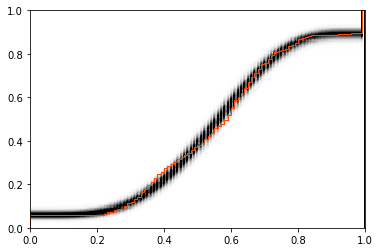

In [10]:
seatsvotes.plot.cdf_shroud(gmhouse.shares.dem_share, simulated_shares)

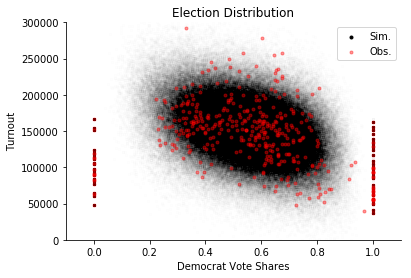

In [23]:
plt.scatter(mixelex.dem_share.values, 
            mixelex.turnout.values, alpha=.005, marker='.', color='k')
plt.scatter((2,),(0,),color='k', marker='.', label='Sim.')
plt.scatter(gmhouse.shares.dem_share.values, 
            gmhouse.turnout.values, 
            marker='.', color='r', alpha=.4, label='Obs.')
plt.xlabel("Democrat Vote Shares")
plt.ylabel("Turnout")
plt.title("Election Distribution")
plt.ylim(0,3e5)
plt.xlim(-.1,1.1)
plt.legend()
sns.despine()
plt.show()

In [12]:
gmca = seatsvotes.GaussianMixture(canada.drop(['name','year'], 
                                              axis=1))\
        .fit()

/home/lw17329/Dropbox/dissert/dev/seatsvotes/seatsvotes/gaussian_mixture/abstracts.py:65: RuntimeWarning: invalid value encountered in true_divide
  self._uncontested_p = unc_d / self.n_uncontested


In [13]:
ca_elex = gmca.simulate_elections(1000)

In [14]:
ca_simulations = ca_elex.groupby('run')
party_sims = [np.vstack(ca_simulations[party].agg(list)) 
              for party in gmca.shares.columns ]

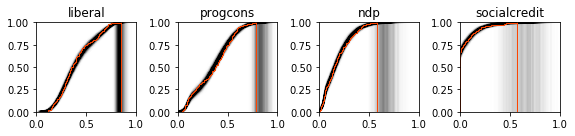

In [15]:
f,ax = plt.subplots(1,gmca.P, sharex=True, figsize=(8,2))
for j,p in enumerate(gmca.shares.columns):
    party = gmca.shares.columns[j]
    sims = party_sims[j]
    seatsvotes.plot.cdf_shroud(gmca.shares[party].values, 
                               sims, ax=ax[j])
    ax[j].set_title(party.split("_")[0])
f.tight_layout()
plt.show()